<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module5/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logistic Regression**
Logistic Regression is a supervised learning algorithm used for **binary** and **multiclass classification** tasks. Unlike **Linear Regression**, which predicts continuous values, **Logistic Regression** predicts the **probability** of a class label using the **sigmoid (logistic) function**. The sigmoid function maps any real-valued number to a range between **0 and 1**, making it ideal for classification.

### **Formula:**
$$ P(Y=1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}} $$

where:  
- $ P(Y=1 | X) $ is the **probability** of the positive class.  
- $ \beta_0, \beta_1, ..., \beta_n $ are the **model coefficients (weights)**.  
- $ X_1, X_2, ..., X_n $ are the **input features**.

### **Loss Function: Binary Cross-Entropy (Log Loss)**
Because the special properties of Logistic Regression, previous loss functions such as MSE cannot be used. Hence, Logistic Regression is trained using the **Binary Cross-Entropy (Log Loss)** function, which measures the difference between actual and predicted probabilities. It is defined as:

$$
\mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where:  
- $ N $ is the number of samples.  
- $ y_i $ is the actual label (0 or 1).  
- $ \hat{y}_i $ is the predicted probability for class **1**.

This loss function penalizes incorrect predictions more when the predicted probability is far from the actual class, forcing the model to adjust its parameters for better classification.


In this notebook, we will implement **Logistic Regression** to predict the output of different datasets


#Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##Data

Load the data

In [3]:
df = pd.read_csv('./titanic_modified_dataset.csv', index_col = 'PassengerId')

df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


Split the data to X and y

In [5]:
dataset_arr = df.to_numpy().astype(np.float64)

X = dataset_arr[:, :-1]
y = dataset_arr[:, -1]

Add bias to X

In [55]:
intercept = np.ones((X.shape[0], 1))

X_b = np.concatenate((intercept, X), axis=1)

X_b

array([[ 1.    ,  3.    ,  0.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  7.75  ,  2.    ,  0.    ]])

Split to train, valid and test (7:2:1)

In [39]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y,
                                                  test_size=val_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                  test_size=test_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

Standardize the dataset

In [40]:
scaler = StandardScaler()

#We don't standardize the bias
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_val[:, 1:] = scaler.transform(X_val[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

##Model

###Core components

####1. Sigmoid function

In [11]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

####2. Predict function

In [69]:
def predict(X, theta):
  z = X.dot(theta)
  y_pred = sigmoid(z)
  return y_pred

X_tmp = np.array([[22.3, -1.5, 1.1, 1]])
theta = np.array([0.1, -0.15, 0.3, -0.2])
predict(X_tmp, theta)

array([0.92988994])

#### 3. Compute loss function

In [70]:
def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (
    -y * \
    np.log(y_hat) - (1 - y) * \
    np.log(1 - y_hat)
  ).mean ()
  return loss

y = np.array([1, 0, 0, 1])
y_hat = np.array([0.8, 0.75, 0.3, 0.95])
compute_loss(y_hat, y)

0.5043515376900958

####4. Compute gradient function

In [79]:
def compute_gradient(X, y, y_hat):
  gradient = np.dot(X.T, y_hat - y)/y.size
  return gradient

X = np.array([[1, 3], [2, 1], [3, 2], [1, 2]])
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.7, 0.4, 0.6, 0.85])
compute_gradient(X, y_true, y_pred)

array([-0.2125, -0.4   ])

####5. Update theta function

In [15]:
def update_theta(theta, gradient, learning_rate):
  return theta - learning_rate*gradient

####6. Compute Accuracy

In [78]:
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta ).round()
  acc = ( y_hat == y).mean()
  return acc

y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.85, 0.35, 0.9, 0.75])
y_pred_rounded = np. round ( y_pred )
accuracy = np. mean ( y_true == y_pred_rounded )
print(accuracy)

1.0


###Main model

In [44]:
def LogisticRegression(X_train, y_train, X_val, y_val, old_theta,
                       batch_size, learning_rate, num_iterations):
  train_accs = []
  train_losses = []
  val_accs = []
  val_losses = []
  theta = old_theta.copy()
  for epoch in range(num_iterations):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []
    for i in range(0, X_train.shape[0], batch_size):
      X_batch = X_train[i:i+batch_size]
      y_batch = y_train[i:i+batch_size]
      y_hat = predict(X_batch, theta)
      loss = compute_loss(y_hat, y_batch)
      gradient = compute_gradient(X_batch, y_batch, y_hat)
      theta = update_theta(theta, gradient, learning_rate)

      train_batch_losses.append(loss)
      train_batch_acc = compute_accuracy(X_train, y_train, theta)
      train_batch_accs.append(train_batch_acc)

      val_batch_loss = compute_loss(predict(X_val, theta), y_val)
      val_batch_losses.append(val_batch_loss)
      val_batch_acc = compute_accuracy(X_val, y_val, theta)
      val_batch_accs.append(val_batch_acc)

    train_batch_loss = sum (train_batch_losses)/len(train_batch_losses)
    train_batch_acc = sum (train_batch_accs)/len(train_batch_accs)
    val_batch_loss = sum (val_batch_losses)/len(val_batch_losses)
    val_batch_acc = sum (val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)
    print (f'\ nEPOCH {epoch + 1}:\ tTraining loss : {train_batch_loss :.3f}\ tValidation loss : { val_batch_loss :.3f}')

  return train_losses, train_accs, val_losses, val_accs, theta

##Running

###Running the model

In [51]:
learning_rate = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape[1])

In [52]:
train_losses, train_accs, val_losses, val_accs, theta = LogisticRegression(X_train, y_train,
                                                                         X_val, y_val,
                                                                         theta, batch_size,
                                                                        learning_rate,
                                                                        epochs)

\ nEPOCH 1:\ tTraining loss : 0.703\ tValidation loss : 0.599
\ nEPOCH 2:\ tTraining loss : 0.670\ tValidation loss : 0.582
\ nEPOCH 3:\ tTraining loss : 0.640\ tValidation loss : 0.567
\ nEPOCH 4:\ tTraining loss : 0.614\ tValidation loss : 0.555
\ nEPOCH 5:\ tTraining loss : 0.592\ tValidation loss : 0.544
\ nEPOCH 6:\ tTraining loss : 0.572\ tValidation loss : 0.535
\ nEPOCH 7:\ tTraining loss : 0.554\ tValidation loss : 0.528
\ nEPOCH 8:\ tTraining loss : 0.539\ tValidation loss : 0.522
\ nEPOCH 9:\ tTraining loss : 0.526\ tValidation loss : 0.517
\ nEPOCH 10:\ tTraining loss : 0.514\ tValidation loss : 0.513
\ nEPOCH 11:\ tTraining loss : 0.504\ tValidation loss : 0.509
\ nEPOCH 12:\ tTraining loss : 0.495\ tValidation loss : 0.507
\ nEPOCH 13:\ tTraining loss : 0.487\ tValidation loss : 0.505
\ nEPOCH 14:\ tTraining loss : 0.480\ tValidation loss : 0.503
\ nEPOCH 15:\ tTraining loss : 0.474\ tValidation loss : 0.502
\ nEPOCH 16:\ tTraining loss : 0.468\ tValidation loss : 0.501
\

###Visualize

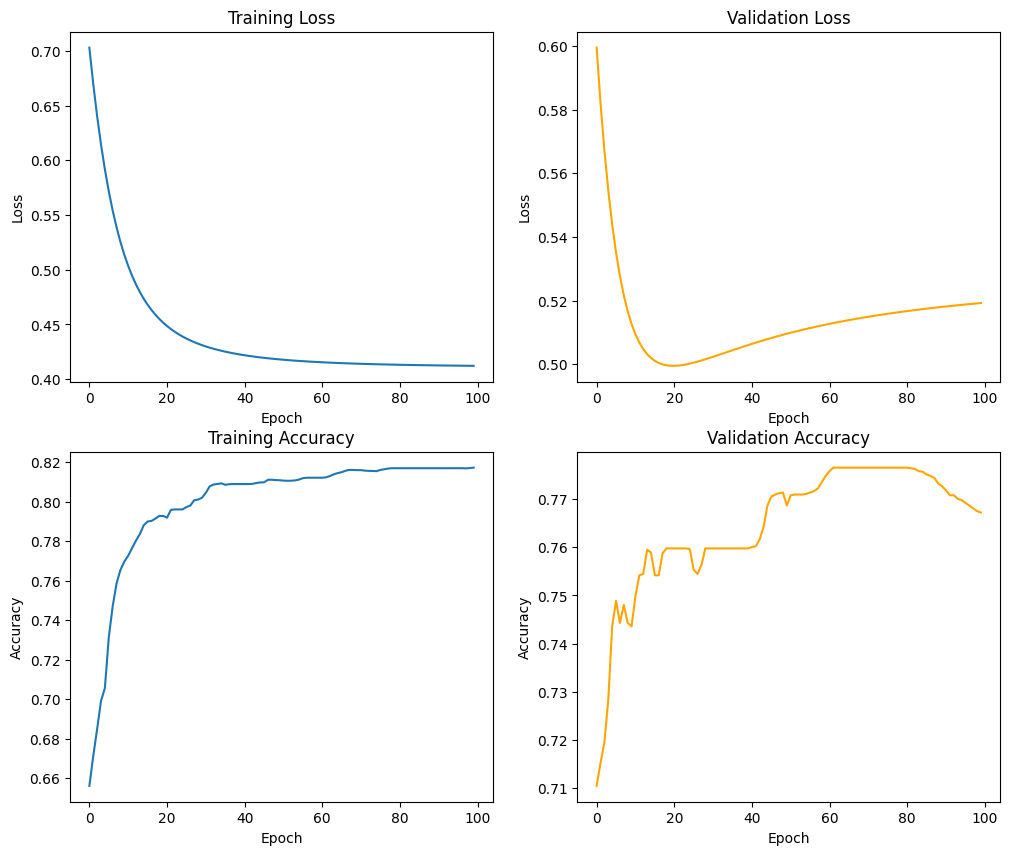

In [53]:
fig , ax = plt . subplots (2, 2, figsize =(12 , 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel ='Epoch', ylabel ='Loss')
ax[0, 0].set_title('Training Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel ='Epoch', ylabel ='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

###Evaluate the model

In [56]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print('Evaluation on validation and test set:')
print(f'Accuracy : { val_set_acc }')
print(f'Accuracy : { test_set_acc }')

Evaluation on validation and test set:
Accuracy : 0.770949720670391
Accuracy : 0.7752808988764045


#Twitter Sentiment Analysis

In [ ]:
import re
import nltk
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

##Data

###Load data

In [75]:
df = pd.read_csv('./sentiment_analysis.csv', index_col = 'id')

df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


###Preprocess data

In [58]:
def text_normalize(text):
  # Retweet old acronym "RT" removal
  text = re.sub(r'^RT[\s]+', '', text)

  # Hyperlinks removal
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

  # Hashtag removal
  text = re.sub(r'#', '', text)

  # Punctuation removal
  text = re.sub (r'[^\ w\s]', '', text )

  #Tokenization
  tokenizer = TweetTokenizer(
    preserve_case =False,
    strip_handles =True,
    reduce_len = True
  )
  text_tokens = tokenizer.tokenize(text)

  return text_tokens

In [59]:
def get_freqs(df):
  freqs = defaultdict (lambda : 0)
  for idx, row in df.iterrows():
    tweet = row ['tweet']
    label = row ['label']

    tokens = text_normalize (tweet)
    for token in tokens :
      pair = (token, label)
      freqs[pair] += 1

  return freqs

In [60]:
def get_feature (text, freqs ):
  tokens = text_normalize(text)

  X = np.zeros(3)
  X[0] = 1

  for token in tokens:
    pair = (token, 1)
    X[1] += freqs[pair]
    X[2] += freqs[pair]

  return X

In [ ]:
X = []
y = []
freqs = get_freqs(df)

for idx, row in df.iterrows():
  tweet = row['tweet']
  label = row['label']

  X.append(get_feature(tweet, freqs))
  y.append(label)

X = np.array(X)
y = np.array(y)

###Split the data

In [61]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=val_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                  test_size=test_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

###Normalize the data

In [62]:
scaler = StandardScaler()

X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_val[:, 1:] = scaler.transform(X_val[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

##Model

###Run the model

In [64]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform (
  size = X_train.shape[1]
)

In [65]:
train_losses, train_accs, val_losses, val_accs, theta = LogisticRegression(X_train, y_train,
                                                                         X_val, y_val,
                                                                         theta, batch_size,
                                                                        learning_rate, epochs)

\ nEPOCH 1:\ tTraining loss : 0.956\ tValidation loss : 0.835
\ nEPOCH 2:\ tTraining loss : 0.917\ tValidation loss : 0.807
\ nEPOCH 3:\ tTraining loss : 0.882\ tValidation loss : 0.782
\ nEPOCH 4:\ tTraining loss : 0.851\ tValidation loss : 0.761
\ nEPOCH 5:\ tTraining loss : 0.823\ tValidation loss : 0.742
\ nEPOCH 6:\ tTraining loss : 0.799\ tValidation loss : 0.726
\ nEPOCH 7:\ tTraining loss : 0.777\ tValidation loss : 0.712
\ nEPOCH 8:\ tTraining loss : 0.757\ tValidation loss : 0.700
\ nEPOCH 9:\ tTraining loss : 0.739\ tValidation loss : 0.690
\ nEPOCH 10:\ tTraining loss : 0.723\ tValidation loss : 0.681
\ nEPOCH 11:\ tTraining loss : 0.709\ tValidation loss : 0.673
\ nEPOCH 12:\ tTraining loss : 0.696\ tValidation loss : 0.667
\ nEPOCH 13:\ tTraining loss : 0.684\ tValidation loss : 0.661
\ nEPOCH 14:\ tTraining loss : 0.673\ tValidation loss : 0.656
\ nEPOCH 15:\ tTraining loss : 0.663\ tValidation loss : 0.651
\ nEPOCH 16:\ tTraining loss : 0.654\ tValidation loss : 0.647
\

###Visualize

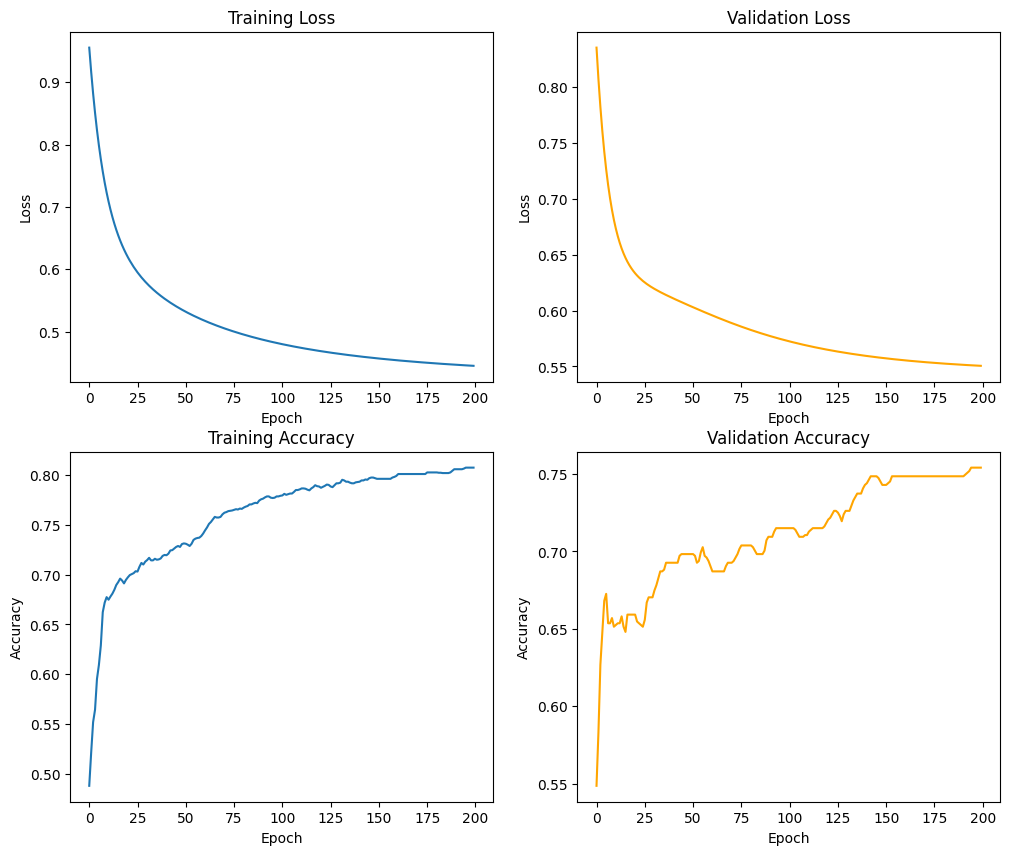

In [66]:
fig , ax = plt . subplots (2, 2, figsize =(12 , 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel ='Epoch', ylabel ='Loss')
ax[0, 0].set_title('Training Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel ='Epoch', ylabel ='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

###Evaluate

In [67]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print('Evaluation on validation and test set:')
print(f'Accuracy : { val_set_acc }')
print(f'Accuracy : { test_set_acc }')

Evaluation on validation and test set:
Accuracy : 0.7541899441340782
Accuracy : 0.7640449438202247
